In [1]:
import pyLIMA, os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyLIMA import event, telescopes
from pyLIMA.simulations import simulator
from pyLIMA.models import FSPL_model,USBL_model,PSPL_model
from ipywidgets import interactive, HBox, VBox, Layout
from ipywidgets import (FloatSlider, FloatLogSlider, interactive_output, HBox, VBox, GridBox, Layout, Label)
from IPython.display import display
current_path = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_path, os.pardir))
print("Parent Directory:", parent_directory)
sys.path.append(parent_directory)
import pyLIMA_plots
from astropy import units as u
from astropy import constants as C
from pyLIMA.xallarap.xallarap import xallarap_shifts, compute_xallarap_curvature

import numpy as np
import pandas as pd
import astropy.units as u

Parent Directory: /home/anibal/binary_source


In [5]:
def orbital_period_kepler(a_au, M_tot_Msun):
    """
    Compute the orbital period of a binary system using Kepler's third law
    in astronomical units.

    Parameters
    ----------
    a_au : float or array-like
        Semimajor axis in astronomical units (AU).
    M_tot_Msun : float or array-like
        Total mass of the system in solar masses (M_sun).

    Returns
    -------
    P_yr : float or ndarray
        Orbital period in years.
    """
    a_au = np.asarray(a_au, dtype=float)
    M_tot_Msun = np.asarray(M_tot_Msun, dtype=float)
    print("Period ", np.sqrt(a_au**3 / M_tot_Msun), "years")
    print("converting to ", np.sqrt(a_au**3 / M_tot_Msun)*365.25, "days (to use in pyLIMA)")
    return np.sqrt(a_au**3 / M_tot_Msun)*365.25*(1/u.day)


def build_case(case_name, rEhat, v_perp, a, M1, M2,
               t0=50, u0=0.1, xi_phase=0, xi_inclination=np.pi/2, flux_ratio=0.0):
    """
    Construye un diccionario con los parámetros de un caso de xallarap.
    """
    q_xi = (M2 / M1).decompose().value
    P = orbital_period_kepler(a, M1 + M2)

    # tE = (rEhat * DL / DS) / v_perp
    tE = (rEhat) / v_perp
    return {
        "case": case_name,
        # "DS_kpc": DS.to(u.kpc).value,
        # "DL_kpc": DL.to(u.kpc).value,
        "rEhat_AU": rEhat.to(u.AU).value,
        "v_perp_kms": v_perp.to(u.km/u.s).value,
        "a_AU": a.to(u.AU).value,
        "M1_Msun": M1.to(u.M_sun).value,
        "M2_Msun": M2.to(u.M_sun).value,
        "xi_mass_ratio": q_xi,
        "tE": tE.to(u.day).value,
        "t0": t0,
        "u0": u0,
        "xiE": (a / rEhat).decompose().value,
        "omega_xi_1_per_day": (2*np.pi / P).value,
        "xi_phase": xi_phase,
        "xi_inclination": xi_inclination,
        "flux_ratio": flux_ratio,
        "P": P.value,
    }

In [10]:
# DS = 8 * u.kpc
# DL = 4 * u.kpc
v_perp = 50 * u.km / u.s
a = 2 * u.AU

rows = []

# =========================
# rEhat = 5 AU
# =========================

rEhat = 5 * u.AU

# Case 1: face-on, P > tE
rows.append(build_case(
    "case1", rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun
))

# Case 2: face-on, P < tE
rows.append(build_case(
    "case2", rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,t0=50, u0=0.1, xi_phase=0, xi_inclination=np.pi/2, flux_ratio=0.0
))

# (case_name, DS, DL, rEhat, v_perp, a, M1, M2,
#                t0=50, u0=0.1, xi_phase=0, xi_inclination=np.pi/2, flux_ratio=0.0)

# Case 3a: edge-on, low mass ratio
rows.append(build_case(
    "case3a", rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=np.pi/2
))

# Case 3b: edge-on, high mass ratio
rows.append(build_case(
    "case3b", rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=np.pi/2
))

# =========================
# rEhat = 2 AU  (Case 4)
# =========================
rEhat = 2 * u.AU

rows.append(build_case(
    "case4-1", rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=0
))

rows.append(build_case(
    "case4-2", rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=0
))

rows.append(build_case(
    "case4-3a", rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=np.pi/2
))

rows.append(build_case(
    "case4-3b", rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=np.pi/2
))

df_cases = pd.DataFrame(rows).set_index("case")
df_cases

Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)


,rEhat_AU,v_perp_kms,a_AU,M1_Msun,M2_Msun,xi_mass_ratio,tE,t0,u0,xiE,omega_xi_1_per_day,xi_phase,xi_inclination,flux_ratio,P
case,,,,,,,,,,,,,,,
case1,5.0,50.0,2.0,2.0,1.4,0.700000,173.145684,50,0.1,0.4,0.011215,0,1.570796,0.0,560.267924
case2,5.0,50.0,2.0,1.4,100.0,71.428571,173.145684,50,0.1,0.4,0.061244,0,1.570796,0.0,102.592648
case3a,5.0,50.0,2.0,2.0,1.4,0.700000,173.145684,50,0.1,0.4,0.011215,0,1.570796,0.0,560.267924
case3b,5.0,50.0,2.0,1.4,100.0,71.428571,173.145684,50,0.1,0.4,0.061244,0,1.570796,0.0,102.592648
case4-1,2.0,50.0,2.0,2.0,1.4,0.700000,69.258273,50,0.1,1.0,0.011215,0,0.000000,0.0,560.267924
case4-2,2.0,50.0,2.0,1.4,100.0,71.428571,69.258273,50,0.1,1.0,0.061244,0,0.000000,0.0,102.592648
case4-3a,2.0,50.0,2.0,2.0,1.4,0.700000,69.258273,50,0.1,1.0,0.011215,0,1.570796,0.0,560.267924
case4-3b,2.0,50.0,2.0,1.4,100.0,71.428571,69.258273,50,0.1,1.0,0.061244,0,1.570796,0.0,102.592648


# Create event, define telescope and choose a model

PyLIMA need that we specify the compontents of $\xi_{E}=(\xi_{E \parallel},\xi_{E \perp}) = $.

Where $\xi_{E \parallel}=\xi_E \cos(\theta)$ and $\xi_{E \perp}=\xi_E \sin(\theta)$.


In [4]:
# df_row['xi_inclination']

In [5]:
# py_params

pyLIMA parameters OrderedDict([('t0', 50.0), ('u0', 0.1), ('tE', 173.14568368055558), ('xi_para', 0.4), ('xi_perp', 0.0), ('xi_angular_velocity', 0.06124401127235416), ('xi_phase', 0.0), ('xi_inclination', 1.5707963267948966), ('xi_mass_ratio', 71.42857142857143), ('q_flux_G', 0.0), ('fsource_Simulation', 1), ('ftotal_Simulation', 0)])


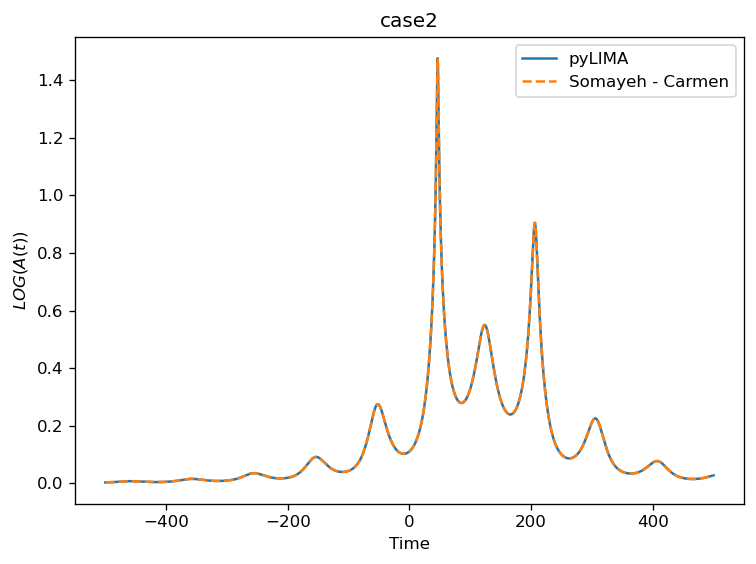

In [11]:
# ---- Event & telescope ----
simulated_event = event.Event()
simulated_event.name = 'Simulated'
simulated_event.ra = 170
simulated_event.dec = -70

t = np.linspace(-500, 500, 5000)
lightcurve_sim = np.c_[t, np.full_like(t, 19.0), np.full_like(t, 0.01)]

tel = telescopes.Telescope(
    name='Simulation',
    camera_filter='G',
    lightcurve=lightcurve_sim.astype(float),
    lightcurve_names=['time','mag','err_mag'],
    lightcurve_units=['JD','mag','mag'],
    location='Earth'
)
simulated_event.telescopes.append(tel)

case_name, df_row =  "case2", df_cases.loc["case2"]
params_list = [0]*12


xiE = df_row['xiE']
t_0 = df_row['t0']
t_E = df_row['tE']
P = df_row['P']
u_0 = df_row['u0']
phi_0 = df_row['xi_phase']
binary_flux_ratio = df_row['flux_ratio']
q = df_row['xi_mass_ratio']
fb = 0
fs=1
theta =0 
lambda_xi = df_row['xi_inclination']
omega = 2*np.pi/P
# for case_name, df_row in df_cases.iterrows():

params_list[0] = t_0#- df_row['xiE']*np.cos(df_row['xi_phase'])*df_row['tE'] 
params_list[1] = u_0# +df_row['xiE']*np.sin(df_row['xi_phase'])
params_list[2] = t_E 
params_list[3] = xiE*np.cos(theta) # <---- THE SOURCE BINARY SISTEM MOVES PARALLEL TO THE SEMI MAJOR AXIS
params_list[4] = xiE*np.sin(theta) # <---- THE SOURCE BINARY SISTEM MOVES PARALLEL TO THE SEMI MAJOR AXIS
params_list[5] = omega
params_list[6] = phi_0   #< ---- Orbital phase at t0
params_list[7] = lambda_xi #pi/2
params_list[8] = q
params_list[9] = binary_flux_ratio
params_list[10] = fs 
params_list[11] = fb 

model = PSPL_model.PSPLmodel(simulated_event, parallax=['None', 0], double_source=['Circular', df_row['t0']]) # <--- Here I set t0,xi = t0
model.define_model_parameters()

# plt.close("all")
# %matplotlib inline
py_params = model.compute_pyLIMA_parameters(params_list)
print("pyLIMA parameters", py_params)

A = model.model_magnification(model.event.telescopes[0], py_params)

plt.figure(dpi=120)
plt.title(case_name)
plt.plot(t, np.log10(A), label="pyLIMA")



def F(f_s, A, fb):
    F_t = f_s*A+fb
    return F_t
def A_u(u):
    A_t = (u**2 + 2)/(u*(u**2 + 4)**(.5))
    return A_t
    
def A_Binary_SC(t,t_0, u_0,t_E,xiE, omega, phi_0,lambda_xi, q , binary_flux_ratio,fs,fb):
    '''
    Somayeh and Carmen implementation
    t (1-d array): time
    t_0(float): time of closest approach
    phi_0 (float): phase
    q(float): mass_ratio
    P (float): period in days
    xiE(float): separation from the source to the barycenter in theta_E units
    binary_flux_ratio(float): binary flux ratio
    
    '''
    
    Omega =  omega*(t - t_0) + phi_0
    a1 =  q/(1+q)     # primary's orbital radius
    a2 =  -1/(1+q) 
    tau =  ((t-t_0)/t_E)
    
    delta_tau = xiE*(np.cos(Omega)-np.cos(phi_0))
    delta_beta = xiE*np.sin(lambda_xi)*(np.sin(Omega)-np.sin(phi_0))
    u1 = np.sqrt((u_0 + a1*delta_beta)**2 + (tau + a1*delta_tau)**2)
    
    m1 = q/(1+q)
    
    # This is the pyLIMA election:
    dx2 = -(1/(1+q))*np.cos(Omega) - (q/(1+q))*np.cos(phi_0)
    dy2 = -(1/(1+q))*np.sin(Omega) - (q/(1+q))*np.sin(phi_0)
    u2 = np.sqrt((u_0 + xiE*dy2)**2 + (tau + xiE*dx2)**2)
    # u2 = np.sqrt((u_0 + a2*delta_beta)**2 + (tau + a2*delta_tau)**2)  # This is the election of Miyazaki with symetry around the barycenter
    A1_binary = A_u(u1)
    A2_binary = A_u(u2)
    A_binary = A1_binary + binary_flux_ratio*A2_binary
    # F_binary1 = F(f_s, A_binary, fb)
    return A_binary 

A_binary = A_Binary_SC(t,t_0, u_0,t_E,xiE, omega, phi_0,lambda_xi, q , binary_flux_ratio,fs,fb)

plt.plot(t, np.log10(A_binary), linestyle='--', label='Somayeh - Carmen')
plt.xlabel("Time")
plt.ylabel(r"$LOG(A(t))$")
plt.legend()
plt.tight_layout()
plt.show()


# from bokeh.plotting import figure, show
    # from bokeh.layouts import row
    
    # # Plot Bokeh para A(t)
    # p1 = figure(width=600, height=400, title=case_name,
    #             x_axis_label="Time", y_axis_label="A(t)")
    # p1.line(time_sim, A, legend_label="DSPL")
    
    # # Plot Bokeh para geometría PyLIMA
    # fig_mpl, p2 = pyLIMA_plots.plot_geometry(model, params_list, bokeh_plot=True)
    
    # show(row(p1, p2))


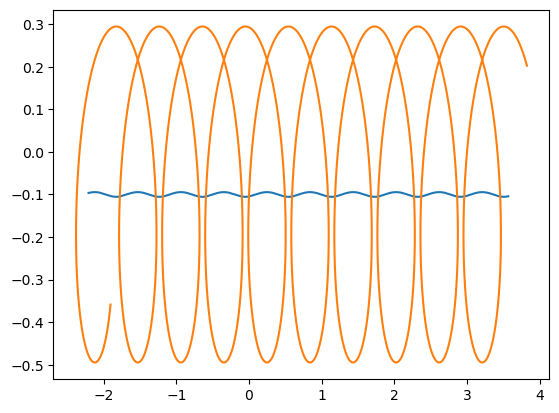

In [12]:
positions= model.sources_trajectory(model.event.telescopes[0], model.compute_pyLIMA_parameters(params_list),data_type="photometry")
plt.plot(positions[2],positions[3])
plt.plot(positions[0],positions[1])

In [13]:
a

<Quantity 2. AU>

In [16]:
xiE_list = (np.linspace(0.5,50)*u.AU / rEhat).decompose().value
xiE_list

array([ 0.25      ,  0.75510204,  1.26020408,  1.76530612,  2.27040816,
        2.7755102 ,  3.28061224,  3.78571429,  4.29081633,  4.79591837,
        5.30102041,  5.80612245,  6.31122449,  6.81632653,  7.32142857,
        7.82653061,  8.33163265,  8.83673469,  9.34183673,  9.84693878,
       10.35204082, 10.85714286, 11.3622449 , 11.86734694, 12.37244898,
       12.87755102, 13.38265306, 13.8877551 , 14.39285714, 14.89795918,
       15.40306122, 15.90816327, 16.41326531, 16.91836735, 17.42346939,
       17.92857143, 18.43367347, 18.93877551, 19.44387755, 19.94897959,
       20.45408163, 20.95918367, 21.46428571, 21.96938776, 22.4744898 ,
       22.97959184, 23.48469388, 23.98979592, 24.49489796, 25.        ])

In [55]:
from astropy.coordinates import SkyCoord
from astropy.time import Time
def _structured_to_matrix(arr, fields):
    """Convierte un array estructurado 1D a matriz 2D por campos; si ya es 2D, lo retorna."""
    if hasattr(arr, "dtype") and getattr(arr.dtype, "names", None):
        # asegurar que todos los campos existen
        fields = [f for f in fields if f in arr.dtype.names]
        return np.column_stack([arr[f] for f in fields])
    # si no es estructurado pero es 1D, forzamos 2D si se puede
    arr = np.asarray(arr)
    if arr.ndim == 1:
        # no sabemos columnas: devolvemos con shape (N,1) para que falle antes que silently wrong
        return arr.reshape(-1, 1)
    return arr

def tel_roman_rubin(path_ephemerides):
    '''
    :param opsim:
    :return:
    '''
    # print(str(script_dir))
    gc = SkyCoord(l=0.5 * u.degree, b=-1.25 * u.degree, frame='galactic')
    gc.icrs.dec.value
    Ra = gc.icrs.ra.value
    Dec = gc.icrs.dec.value

    # Bandpasses Rubin (igual que antes)
    # LSST_BandPass = {}
    # lsst_filterlist = 'ugrizy'
    # for f in lsst_filterlist:
    #     LSST_BandPass[f] = Bandpass()
    #     path_che = '/home/anibal-pc/rubin_sim_data/throughputs/baseline/'
    #     #path_che = '/share/storage3/rubin/microlensing/romanrubin/rubin_sim_data/throughputs/baseline/'
    #     # LSST_BandPass[f].read_throughput(str(script_dir)+'/troughputs/' + f'total_{f}.dat')
    #     LSST_BandPass[f].read_throughput(path_che + f'total_{f}.dat')

    # # === PERSISTE/LEE dataSlice (MAF) ===
    # ds_name = f"dataslice_ra{Ra:.5f}_dec{Dec:.5f}"
    # ds_npz = _npz_path(ds_name)

    # if ds_npz.exists():
    #     packed = np.load(ds_npz, allow_pickle=True)
    #     dataSlice = packed['dataSlice']
    # else:
    #     baseline_file = get_baseline()
    #     conn = baseline_file
    #     # outDir único por proceso para evitar colisiones si hay paralelo
    #     outDir = str(_CACHE_DIR / f"maf_{os.getpid()}")
    #     os.makedirs(outDir, exist_ok=True)

    #     resultsDb = maf.db.ResultsDb()
    #     metric = maf.metrics.PassMetric(cols=['filter', 'observationStartMJD', 'fiveSigmaDepth'])
    #     slicer = maf.slicers.UserPointsSlicer(ra=[Ra], dec=[Dec])
    #     sql = ''
    #     metric_bundle = maf.MetricBundle(metric, slicer, sql)
    #     bundleDict = {'my_bundle': metric_bundle}
    #     bg = maf.MetricBundleGroup(bundleDict, conn, out_dir=outDir, results_db=resultsDb)

    #     _acquire_lock(ds_name)
    #     try:
    #         if ds_npz.exists():
    #             packed = np.load(ds_npz, allow_pickle=True)
    #             dataSlice = packed['dataSlice']
    #         else:
    #             bg.run_all()
    #             dataSlice = metric_bundle.metric_values[0]
    #             # guardar directo (evita FileNotFoundError de os.replace en NFS)
    #             try:
    #                 np.savez_compressed(str(ds_npz), dataSlice=dataSlice)
    #             except Exception as e:
    #                 print(f"[warn] no pude guardar {ds_npz}: {e}")
    #     finally:
    #         _release_lock(ds_name)
    # dataSlice = np.load(path_dataslice, allow_pickle=True)

    # Construye rubin_ts con dataSlice
    # rubin_ts = {}
    # for fil in lsst_filterlist:
    #     m5 = dataSlice['fiveSigmaDepth'][np.where(dataSlice['filter'] == fil)]
    #     mjd = dataSlice['observationStartMJD'][np.where(dataSlice['filter'] == fil)] + 2400000.5
    #     int_array = np.column_stack((mjd, m5, m5)).astype(float)
    #     rubin_ts[fil] = int_array

    # Plantilla Roman: persistir/cargar temporadas unidas
    tlsst = 60413.26382860778 + 2400000.5
    tstart_Roman = 2461508.763828608  # tlsst + 3*365 #Roman is expected to be launch in may 2027

    my_own_creation = event.Event(ra=Ra, dec=Dec)
    my_own_creation.name = 'An event observed by Roman'
    nominal_seasons = [
        {'start': '2027-02-11T00:00:00', 'end': '2027-04-24T00:00:00'},
        {'start': '2027-08-16T00:00:00', 'end': '2027-10-27T00:00:00'},
        {'start': '2028-02-11T00:00:00', 'end': '2028-04-24T00:00:00'},
        {'start': '2030-02-11T00:00:00', 'end': '2030-04-24T00:00:00'},
        {'start': '2030-08-16T00:00:00', 'end': '2030-10-27T00:00:00'},
        {'start': '2031-02-11T00:00:00', 'end': '2031-04-24T00:00:00'},
    ]
    off_seasons = [
        {"start": "2028-08-15T00:00:00", "end": "2028-10-27T00:00:00"},
        {"start": "2029-02-11T00:00:00", "end": "2029-04-24T00:00:00"},
        {"start": "2029-08-16T00:00:00", "end": "2029-10-27T00:00:00"}
    ]

    # rt_name = "roman_template_W149"
    # rt_npz = _npz_path(rt_name)

    # if rt_npz.exists():
    #     packed = np.load(rt_npz, allow_pickle=True)
    #     combined_array = packed['combined_array']
    #     # convertir a matriz 2D por campos (puede ser estructurado)
    #     mat_all = _structured_to_matrix(
    #         combined_array,
    #         ['time','mag','err_mag','flux','err_flux','inv_err_flux']
    #     )
    #     # usar solo time, mag, err_mag
    #     if mat_all.shape[1] < 3:
    #         raise ValueError("roman_template_W149 npz no tiene columnas suficientes (esperaba >=3).")
    #     roman_mag = mat_all[:, :3]
    #     Roman_tot = telescopes.Telescope(
    #         name='W149', camera_filter='W149', location='Space',
    #         lightcurve=roman_mag,
    #         lightcurve_names=['time','mag','err_mag'],
    #         lightcurve_units=['d','mag','mag']  # 'd' (días)
    #     )
    # else:
    Roman_tot_tmp = simulator.simulate_a_telescope(name='W149',
                                                   time_start=tstart_Roman + 107 + 72 * 5 + 113 * 2 + 838.36 + 107,
                                                   time_end=tstart_Roman + 107 + 72 * 5 + 113 * 2 + 838.36 + 107 + 72,
                                                   sampling=121/600,
                                                   location='Space', camera_filter='W149', uniform_sampling=True,
                                                   astrometry=False)
    lightcurve_fluxes = []
    for season in nominal_seasons:
        tstart = Time(season['start'], format='isot').jd
        tend = Time(season['end'], format='isot').jd
        Roman = simulator.simulate_a_telescope(name='W149',
                                               time_start=tstart,
                                               time_end=tend,
                                               sampling=121/600,
                                               location='Space',
                                               camera_filter='W149',
                                               uniform_sampling=True,
                                               astrometry=False)
        lightcurve_fluxes.append(Roman.lightcurve)
    for season in off_seasons:
        tstart = Time(season['start'], format='isot').jd
        tend = Time(season['end'], format='isot').jd
        Roman = simulator.simulate_a_telescope(name='W149',
                                               time_start=tstart,
                                               time_end=tend,
                                               sampling=24*3,
                                               location='Space',
                                               camera_filter='W149',
                                               uniform_sampling=True,
                                               astrometry=False)
        lightcurve_fluxes.append(Roman.lightcurve)

    # Este es array estructurado 1D
    combined_array = np.concatenate([lc.as_array() for lc in lightcurve_fluxes])
    # convertir a matriz 2D por campos
    mat_all = _structured_to_matrix(
        combined_array,
        ['time','mag','err_mag','flux','err_flux','inv_err_flux']
    )
    if mat_all.shape[1] < 3:
        raise ValueError("Roman combinado no tiene columnas suficientes (>=3).")
    roman_mag = mat_all[:, :3]

    Roman_tot = telescopes.Telescope(
        name='W149', camera_filter='W149', location='Space',
        lightcurve=roman_mag,
        lightcurve_names=['time','mag','err_mag'],
        lightcurve_units=['d','mag','mag']  # 'd'
    )
        # guardar plantilla a disco (guardamos el array estructurado completo)
        # try:
        #     np.savez_compressed(str(rt_npz), combined_array=combined_array)
        # except Exception as e:
        #     print(f"[warn] no pude guardar {rt_npz}: {e}")

    ephemerides = np.load(path_ephemerides)
    Roman_tot.spacecraft_name = 'L2'
    Roman_tot.spacecraft_positions = {'astrometry': [], 'photometry': ephemerides}
    my_own_creation.telescopes.append(Roman_tot)

    # for band in lsst_filterlist:
    #     lsst_telescope = telescopes.Telescope(
    #         name=band, camera_filter=band, location='Earth',
    #         lightcurve=rubin_ts[band],
    #         lightcurve_names=['time','mag','err_mag'],
    #         lightcurve_units=['d','mag','mag']  # 'd'
    #     )
    #     my_own_creation.telescopes.append(lsst_telescope)
        # display(lsst_telescope.lightcurve)

    return my_own_creation


/home/anibal/anaconda3/envs/roman_rubin/lib/python3.11/site-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


In [87]:
from pathlib import Path

def save_lightcurve_txt(outpath, time, mag, err_mag, header_lines, fmt_time="%.8f"):
    """
    Guarda una curva de luz en TXT con 3 columnas: time, mag, err_mag,
    incluyendo un header multilínea.
    """
    outpath = Path(outpath)
    outpath.parent.mkdir(parents=True, exist_ok=True)

    data = np.column_stack([time, mag, err_mag])

    header = "\n".join(header_lines)

    np.savetxt(
        outpath,
        data,
        header=header,
        comments="# ",
        fmt=f"{fmt_time} %.6f %.6f"
    )


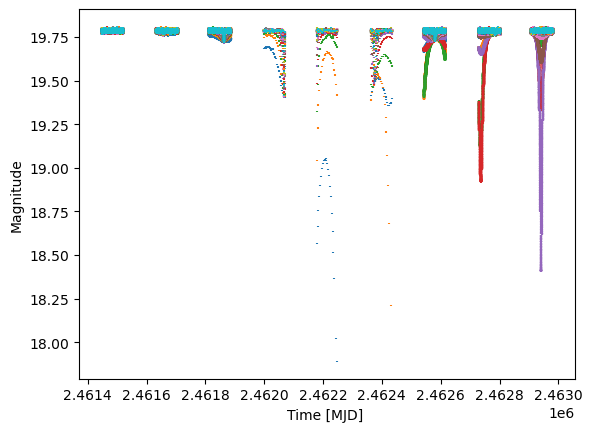

In [93]:
from pyLIMA.simulations import simulator
path_ephemerides = '/home/anibal/binary_source/ephemerides/Roman_positions.npy'
simulated_event = tel_roman_rubin(path_ephemerides)

case_name, df_row =  "case2", df_cases.loc["case2"]
params_list = [0]*10


# xiE = df_row['xiE']
xiE_list = (np.linspace(0.5,50)*u.AU / rEhat).decompose().value
t_0 = 2.46221e6
t_E = df_row['tE']
P = df_row['P']
u_0 = df_row['u0']
phi_0 = df_row['xi_phase']
binary_flux_ratio = df_row['flux_ratio']
q = df_row['xi_mass_ratio']
fb = 0
fs=1
theta =0 
lambda_xi = df_row['xi_inclination']
omega = 2*np.pi/P

# for case_name, df_row in df_cases.iterrows():
for xiE in xiE_list:
    params_list[0] = t_0#- df_row['xiE']*np.cos(df_row['xi_phase'])*df_row['tE'] 
    params_list[1] = u_0# +df_row['xiE']*np.sin(df_row['xi_phase'])
    params_list[2] = t_E 
    params_list[3] = xiE*np.cos(theta) # <---- THE SOURCE BINARY SISTEM MOVES PARALLEL TO THE SEMI MAJOR AXIS
    params_list[4] = xiE*np.sin(theta) # <---- THE SOURCE BINARY SISTEM MOVES PARALLEL TO THE SEMI MAJOR AXIS
    params_list[5] = omega
    params_list[6] = phi_0   #< ---- Orbital phase at t0
    params_list[7] = lambda_xi #pi/2
    params_list[8] = q
    params_list[9] = binary_flux_ratio
    # params_list[10] = fs 
    # params_list[11] = fb 
    
    model = PSPL_model.PSPLmodel(simulated_event, parallax=['None', 0], double_source=['Circular', df_row['t0']]) # <--- Here I set t0,xi = t0
    # model.define_model_parameters()
    
    ZP = {'W149': 27.615, 'u': 27.03, 'g': 28.38, 'r': 28.16,
          'i': 27.85, 'z': 27.46, 'y': 26.68}
    my_own_flux_parameters = []
    fs, G, F = {}, {}, {}
    flux_ratio_source = {}
    # np.random.seed(i)
    # for band in magstar:
    band ="W149"
    flux_baseline = 10 ** ((ZP[band] - 20) / 2.5)
    g = 0.2
    f_source = flux_baseline / (1 + g)
    # print(f_source)
    fs[band] = f_source
    G[band] = g
    F[band] = f_source + g * f_source  # flux_baseline
    f_total = f_source * (1 + g)
    if model.blend_flux_parameter == "ftotal":
        my_own_flux_parameters.append(f_source)
        my_own_flux_parameters.append(f_total)
    else:
        my_own_flux_parameters.append(f_source)
        my_own_flux_parameters.append(f_source * g)
    # print(my_own_flux_parameters)
    
    
    params_list += my_own_flux_parameters
    # print(params_list)
    
    
    py_params = model.compute_pyLIMA_parameters(params_list)
    
    # print("pyLIMA parameters", py_params)
    simulator.simulate_lightcurve(model, py_params)
    A = model.model_magnification(model.event.telescopes[0], py_params)
    time = model.event.telescopes[0].lightcurve['time'].value
    mag = model.event.telescopes[0].lightcurve['mag'].value
    err_mag = model.event.telescopes[0].lightcurve['err_mag'].value
    plt.errorbar(t, mag, err_mag, label="pyLIMA", linestyle='')
    plt.xlabel("Time [MJD] ")
    plt.ylabel("Magnitude")
    plt.gca().invert_yaxis()
    data = np.column_stack([time, mag, err_mag])
    header_lines = [
            "Simulated microlensing lightcurve (xallarap scan)",
            "Columns: time  mag  err_mag",
            f"xiE = {xiE}",
            f"t0 = {params_list[0]}",
            f"u0 = {params_list[1]}",
            f"tE = {params_list[2]}",
            f"xi_para = {params_list[3]}",
            f"xi_perp = {params_list[4]}",
            f"omega = {params_list[5]}",
            f"phi_0 = {params_list[6]}",
            f"lambda_xi = {params_list[7]}",
            f"q = {params_list[8]}",
            f"binary_flux_ratio = {params_list[9]}",
        ]
    
        # Nombre de archivo: ordenado y único
        # Si xiE es float, lo formateo para que el nombre no tenga cosas raras.
    fname = f"lc_xiE_{float(xiE):.6f}.txt"
    outdir = "/home/anibal/binary_source/lightcurves_binary"
    outpath = Path(outdir) / fname

    # Guardar
    save_lightcurve_txt(outpath, time, mag, err_mag, header_lines)


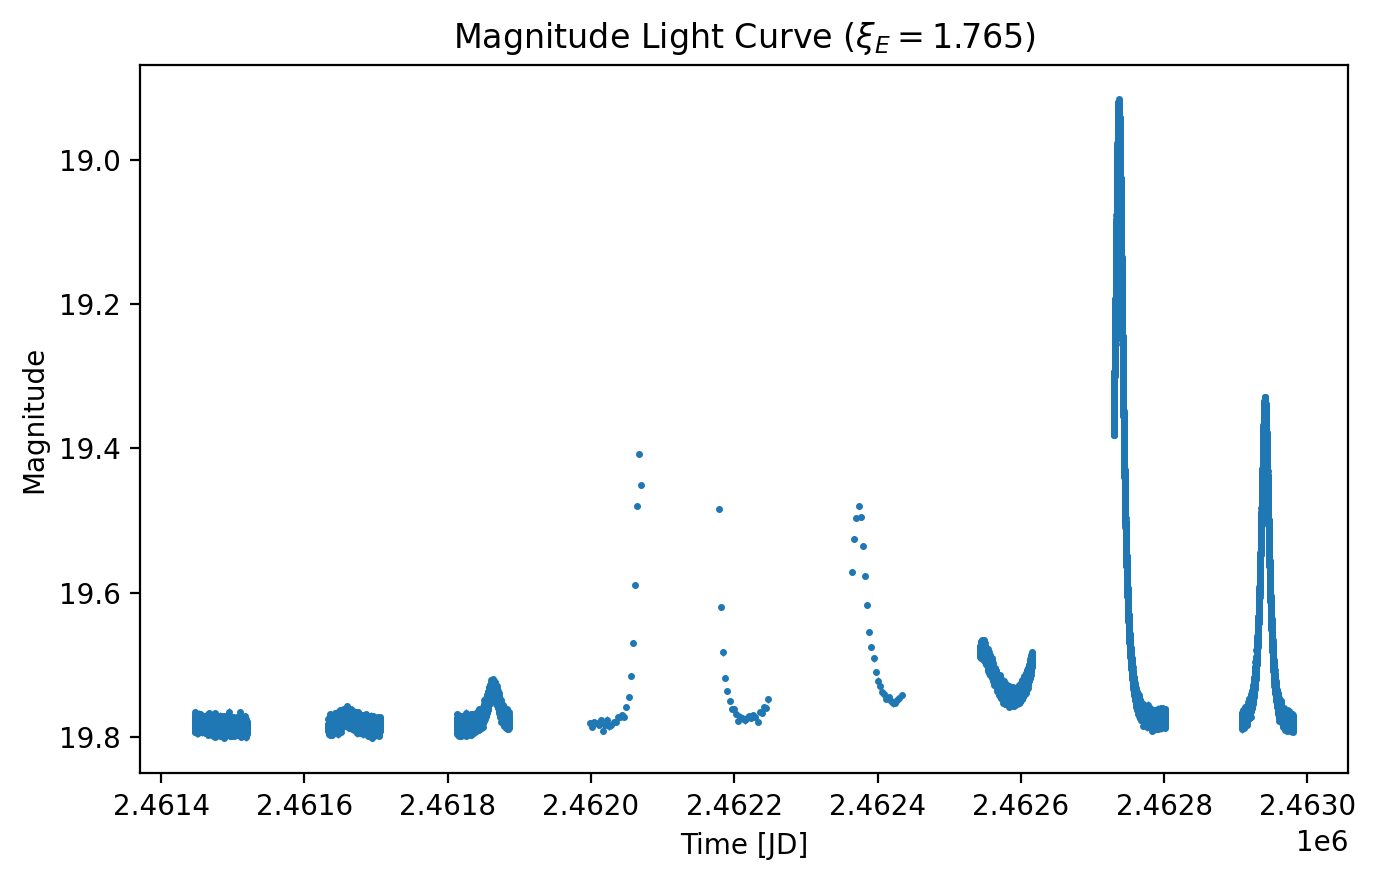

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

def read_lightcurve_with_header(path):
    """
    Lee archivo TXT con header comentado (#) y columnas:
    time, mag, err_mag.

    Retorna:
        time, mag, err_mag, params_dict
    """
    path = Path(path)

    header_lines = []
    with open(path, "r") as f:
        for line in f:
            if line.startswith("#"):
                header_lines.append(line[1:].strip())
            else:
                break

    # Parsear parámetros tipo "key = value"
    params = {}
    for line in header_lines:
        if "=" in line:
            key, val = line.split("=", 1)
            key = key.strip()
            val = val.strip()
            try:
                val = float(val)
            except ValueError:
                pass
            params[key] = val

    data = np.loadtxt(path, comments="#")
    if data.ndim == 1:
        data = data.reshape(1, -1)

    time = data[:, 0]
    mag = data[:, 1]
    err_mag = data[:, 2]

    return time, mag, err_mag, params


def plot_lightcurve_paper(time, mag, err_mag, params=None):
    """
    Grafica curva con formato profesional para paper.
    """
    plt.figure(figsize=(7, 4.5), dpi=200)

    plt.errorbar(
        time,
        mag,
        yerr=err_mag,
        fmt=".",
        markersize=3,
        linewidth=0.5
    )

    plt.xlabel("Time [JD]")
    plt.ylabel("Magnitude")
    plt.gca().invert_yaxis()

    # ---- Título profesional ----
    if params and "xiE" in params:
        title = rf"Magnitude Light Curve ($\xi_E = {params['xiE']:.3f}$)"
        plt.title(title)

    plt.tight_layout()
    plt.show()


file_path = "../lightcurves_binary/lc_xiE_1.765306.txt"  # cambialo por el tuyo

time, mag, err_mag, params = read_lightcurve_with_header(file_path)
plot_lightcurve_paper(time, mag, err_mag, params)


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

simulated_event = event.Event()
simulated_event.name = 'Simulated'
simulated_event.ra = 170
simulated_event.dec = -70

t = np.linspace(-500, 500, 5000)
lightcurve_sim = np.c_[t, np.full_like(t, 19.0), np.full_like(t, 0.01)]

tel = telescopes.Telescope(
    name='Simulation',
    camera_filter='G',
    lightcurve=lightcurve_sim.astype(float),
    lightcurve_names=['time','mag','err_mag'],
    lightcurve_units=['JD','mag','mag'],
    location='Earth'
)
simulated_event.telescopes.append(tel)

case_name, df_row = "case2", df_cases.loc["case2"]
params_list = [0]*12

xiE_list = (np.linspace(0.5, 100, 200) * u.AU / rEhat).decompose().value  # podés ajustar N=80

t_0 = df_row['t0']
t_E = df_row['tE']
P = df_row['P']
u_0 = df_row['u0']
phi_0 = df_row['xi_phase']
binary_flux_ratio = df_row['flux_ratio']
q = df_row['xi_mass_ratio']
fb = 0
fs = 1
theta = 0
lambda_xi = df_row['xi_inclination']
omega = 2*np.pi / P


# ============================================================
# [NUEVO BLOQUE] helper: calcula A(t) para un xiE dado
# ============================================================
def compute_log10A_for_xiE(xiE_value: float) -> np.ndarray:
    params_list[0]  = t_0
    params_list[1]  = u_0
    params_list[2]  = t_E
    params_list[3]  = xiE_value * np.cos(theta)
    params_list[4]  = xiE_value * np.sin(theta)
    params_list[5]  = omega
    params_list[6]  = phi_0
    params_list[7]  = lambda_xi
    params_list[8]  = q
    params_list[9]  = binary_flux_ratio
    params_list[10] = fs
    params_list[11] = fb

    model = PSPL_model.PSPLmodel(
        simulated_event,
        parallax=['None', 0],
        double_source=['Circular', df_row['t0']]  # t0_xi = t0
    )
    model.define_model_parameters()

    py_params = model.compute_pyLIMA_parameters(params_list)
    A = model.model_magnification(model.event.telescopes[0], py_params)

    # seguridad numérica mínima
    A = np.asarray(A, dtype=float)
    # A[A <= 0] = np.nan
    return A


# ============================================================
# [NUEVO BLOQUE] define a(xiE) en AU (a = xiE * rEhat)
# ============================================================
rEhat_AU = rEhat.to(u.AU).value  # si rEhat ya está en AU, esto es directo
def a_AU(xiE_value: float) -> float:
    return xiE_value * rEhat_AU


# ============================================================
# [NUEVO BLOQUE] animación y guardado GIF
# ============================================================
fig, ax = plt.subplots(figsize=(8, 4.5), dpi=150)

# precomputo opcional (más rápido al animar, pero usa RAM)
log10A_stack = [compute_log10A_for_xiE(xiE) for xiE in xiE_list]

(line,) = ax.plot([], [], lw=1.5)
# ax.set_ylim(0,0.5)
ax.set_xlabel("t")
ax.set_ylabel(r"$\log_{10} A$")
ax.set_xlim(t.min(), t.max())
ax.set_yscale("log")
# podés fijar límites y para evitar autoscale frame a frame:
finite_vals = np.concatenate([arr[np.isfinite(arr)] for arr in log10A_stack if np.any(np.isfinite(arr))])
if finite_vals.size > 0:
    ymin, ymax = np.nanpercentile(finite_vals, [1, 99])
    ax.set_ylim(0.7, 3.5)

def init():
    line.set_data([], [])
    ax.set_title("")
    return (line,)

def update(frame_idx: int):
    xiE = float(xiE_list[frame_idx])
    y = log10A_stack[frame_idx]

    line.set_data(t, y)
    ax.set_title(r"$\xi_E$ = "+f"{xiE:.3f}   |   a = {a_AU(xiE):.3f} AU")
    return (line,)

anim = FuncAnimation(
    fig,
    update,
    frames=len(xiE_list),
    init_func=init,
    interval=500,   # ms entre frames (ajustá a gusto)
    blit=False
)

out_gif = f"{case_name}_xiE_scan.gif"
anim.save(out_gif, writer=PillowWriter(fps=12))
plt.close(fig)

print("GIF guardado en:", out_gif)


GIF guardado en: case2_xiE_scan.gif
